Worked with Angelo Iannielli - s317887

In [128]:
from itertools import product
import numpy as np
from scipy import sparse
from random import random, choice, randint, seed
from functools import reduce
from copy import copy
import math
import matplotlib.pyplot as plt

In [129]:
num_points = [100, 1_000, 5_000]
num_sets = num_points
density = [.3, .7] 

In [130]:
def make_set_covering_problem(num_points, num_sets, density):
    """Returns a sparse array where rows are sets and columns are the covered items"""
    seed(num_points*2654435761+num_sets+density)
    sets = sparse.lil_array((num_sets, num_points), dtype=bool)
    for s, p in product(range(num_sets), range(num_points)):
        if random() < density:
            sets[s, p] = True
    for p in range(num_points):
        sets[randint(0, num_sets-1), p] = True
    return sets

# Halloween Challenge

Find the best solution with the fewest calls to the fitness functions for:

* `num_points = [100, 1_000, 5_000]`
* `num_sets = num_points`
* `density = [.3, .7]` 

In [131]:
SETS = make_set_covering_problem(num_points[1], num_sets[1], density[1])

# Hill-Climbing

In [132]:
# Taken from Giovanni Squillero's notebook on Github
def evaluate(state):
    cost = sum(state) 
    valid = np.all(
        reduce(
            np.logical_or,
            [SETS.getrow(i).toarray().flatten() for i, t in enumerate(state) if t],
            np.array([False for _ in range(num_points[1])]),
        )
    ) 
    return valid, -cost if valid else 0 

In [133]:
def tweak(state):
    new_state = copy(state)
    index = randint(0, num_sets[1] - 1)
    new_state[index] = not new_state[index]


    return new_state

Step: 0 Current state: (False, 0)
Step: 1 Current state: (False, 0)
Step: 2 Current state: (False, 0)
Step: 3 Current state: (False, 0)
Step: 4 Current state: (False, 0)
Step: 5 Current state: (False, 0)
Step: 6 Current state: (True, -7)
Step: 52 Current state: (True, -6)
Step: 61 Current state: (True, -5)
Final state: (True, -5)


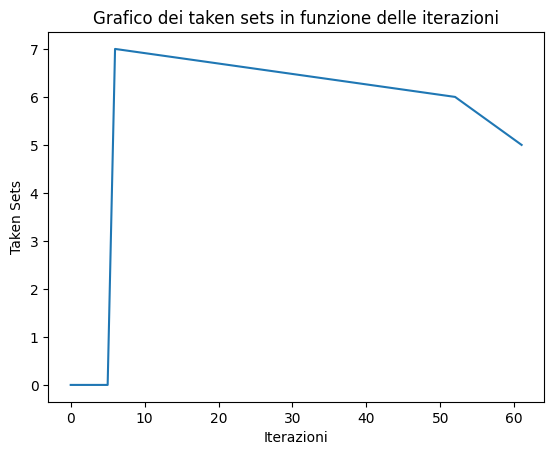

In [137]:

current_state = [choice([True, False]) for _ in range(num_sets[1])]
# current_state = [choice([False]) for _ in range(num_sets[1])]
taken_sets = []
iterations = 10000
iteration_sets = []
for step in range(iterations):
    
    new_state = tweak(current_state)
    if evaluate(new_state) >= evaluate(current_state):
        current_state = new_state
        # print(current_state, evaluate(current_state))
        taken_sets.append(-evaluate(current_state)[1])
        iteration_sets.append(step)
        print("Step: " + str(step) + " Current state: " + str(evaluate(current_state)))
        
print("Final state:", evaluate(current_state))

plt.plot(iteration_sets,taken_sets)
plt.xlabel('Iterazioni')
plt.ylabel('Taken Sets')
plt.title('Grafico dei taken sets in funzione delle iterazioni')
plt.show()

# Simulated Annealing

In [ ]:

def acceptance_probability(current_solution, tweaked_solution, temp):
    
    x = -abs(current_solution[1] - tweaked_solution[1]) / temp
    return math.exp(x)

In [135]:
current_state = [choice([True, False]) for _ in range(num_sets[1])]
# current_state = [choice([False]) for _ in range(num_sets[1])]
iterations = 2000
temp_array = []
probability_array = []
taken_sets = []
iteration_sets = []

for step in range(iterations):
    new_state = tweak(current_state)
    temp = iterations / (5*step + 1)
    temp_array.append(temp)
    p = acceptance_probability(evaluate(current_state), evaluate(new_state), temp)
    probability_array.append(p)
    
    if evaluate(new_state) >= evaluate(current_state) or random() < p:
        current_state = new_state
        # print(current_state, evaluate(current_state))
        taken_sets.append(-evaluate(current_state)[1])
        iteration_sets.append(step)
        print("Step: " + str(step) + " Current state: " + str(evaluate(current_state)))

print("Final state:", evaluate(current_state))

plt.plot(iteration_sets,taken_sets)
plt.xlabel('Iterazioni')
plt.ylabel('Taken Sets')
plt.title('Grafico dei taken sets in funzione delle iterazioni')
plt.show()

plt.plot(range(iterations),temp_array)
plt.xlabel('Iterazioni')
plt.ylabel('Valori di temp_array')
plt.title('Grafico di temp_array in funzione delle iterazioni')
plt.show()

plt.plot(range(iterations),probability_array)
plt.xlabel('Iterazioni')
plt.ylabel('Valori di probability_array')
plt.title('Grafico di probability_array in funzione delle iterazioni')
plt.show()




Step: 0 Current state: (False, 0)
Step: 1 Current state: (False, 0)
Step: 2 Current state: (False, 0)
Step: 3 Current state: (False, 0)
Step: 4 Current state: (False, 0)
Step: 5 Current state: (False, 0)
Step: 6 Current state: (True, -7)
Step: 7 Current state: (True, -8)
Step: 8 Current state: (True, -9)
Step: 9 Current state: (True, -10)
Step: 10 Current state: (True, -11)
Step: 11 Current state: (True, -12)
Step: 12 Current state: (True, -13)
Step: 13 Current state: (True, -14)
Step: 14 Current state: (True, -15)
Step: 16 Current state: (True, -16)
Step: 17 Current state: (True, -17)
Step: 18 Current state: (True, -18)
Step: 19 Current state: (True, -19)
Step: 20 Current state: (True, -20)
Step: 21 Current state: (True, -21)
Step: 22 Current state: (True, -22)
Step: 23 Current state: (True, -23)
Step: 24 Current state: (True, -24)
Step: 25 Current state: (True, -25)
Step: 26 Current state: (True, -26)
Step: 27 Current state: (True, -27)
Step: 28 Current state: (True, -28)
Step: 29 Cu

KeyboardInterrupt: 